# Kitti Dataset Loader

In [1]:
import os
import subprocess
from PIL import Image
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import cv2
# from datasets.base import BaseDataset
# from utils.boxes import generate_anchors


In [2]:
filename = 'C://Users/Billi/repos/Computer_Vision/SqueezeDetect/data/kitti/training/image_2/000019.png'

In [3]:
image = Image.open(filename)

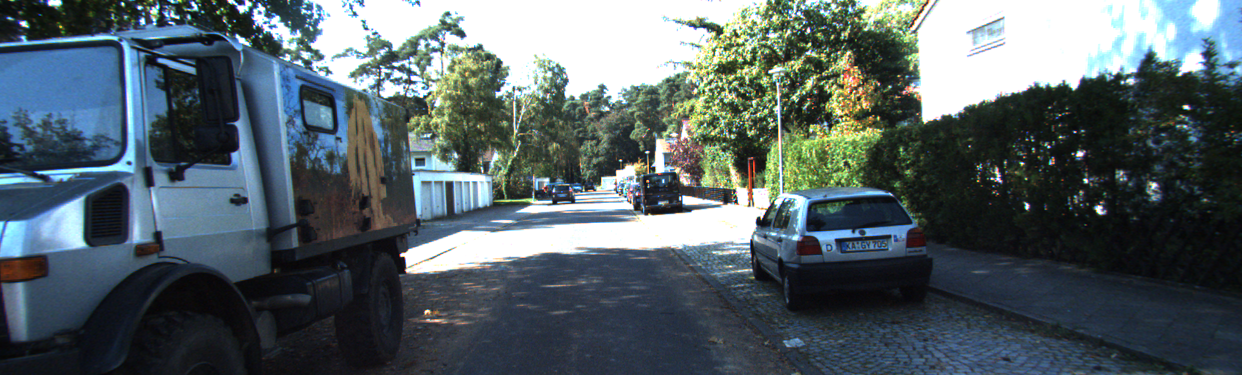

In [4]:
image

Data Format:

   # Values    Name      Description
------------------------------------------------------------------------------------
1.   1: ----- type  ----- Describes the type of object: 'Car', 'Van', 'Truck',
                     'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram',
                     'Misc' or 'DontCare'
2.   1 -----truncated-----Float from 0 (non-truncated) to 1 (truncated), where
                     truncated refers to the object leaving image boundaries
3.   1----- occluded-----Integer (0,1,2,3) indicating occlusion state:
                     0 = fully visible, 1 = partly occluded
                     2 = largely occluded, 3 = unknown
4.   1-----alpha-----Observation angle of object, ranging [-pi..pi]
5.   4-----bbox-----2D bounding box of object in the image (0-based index):
                     contains left, top, right, bottom pixel coordinates
6.   3-----dimensions-----3D object dimensions: height, width, length (in meters)
7.   3-----location-----3D object location x,y,z in camera coordinates (in meters)
8.   1-----rotation_y-----Rotation ry around Y-axis in camera coordinates [-pi..pi]
9.   1-----score-----Only for results: Float, indicating confidence in
                     detection, needed for p/r curves, higher is better.
                     
We do not have a score so we don't work with it. The model is what acctually outputs the score


In [5]:
data_dir = 'C://Users/Billi/repos/Computer_Vision/SqueezeDetect/data/kitti/'
sample_set_name = 'train.txt'

In [10]:
def get_sample_ids():
#     sample_set_name = 'train.txt' if self.phase == 'train' \
#         else 'val.txt' if self.phase == 'val' \
#         else 'trainval.txt' if self.phase == 'trainval' \
#         else None

    sample_ids_path = os.path.join(data_dir, 'image_sets/', sample_set_name)
    with open(sample_ids_path, 'r') as fp:
        sample_ids = fp.readlines()
    sample_ids = tuple(x.strip() for x in sample_ids)
    return sample_ids, sample_ids_path

In [15]:
sample_ids, samples_ids_path = get_sample_ids()

In [48]:
# get_sample_ids()
def load_image(index):
    image_id = sample_ids[index]
    image_path = os.path.join(data_dir, 'training/image_2', image_id + '.png')
    image = skimage.io.imread(image_path) # .astype(np.float32)
    return image, image_id


In [53]:
class_names = ('Car', 'Pedestrian', 'Cyclist', 'Truck')
class_ids_dict = {cls_name: cls_id for cls_id, cls_name in enumerate(class_names)}


In [56]:
class_ids_dict

{'Car': 0, 'Pedestrian': 1, 'Cyclist': 2, 'Truck': 3}

In [54]:
def load_annotations(index):
    ann_id = sample_ids[index]
    ann_path = os.path.join(data_dir, 'training/label_2', ann_id + '.txt')
    with open(ann_path, 'r') as fp:
        annotations = fp.readlines()

    annotations = [ann.strip().split(' ') for ann in annotations]
    class_ids, boxes = [], []
    for ann in annotations:
        if ann[0] not in class_names:
            continue
        class_ids.append(class_ids_dict[ann[0]])
        boxes.append([float(x) for x in ann[4:8]])

    class_ids = np.array(class_ids, dtype = np.int16)
    boxes = np.array(boxes, dtype=np.float32)

    return class_ids, boxes

In [55]:
load_annotations(2000)

(array([0, 0, 0, 0, 0], dtype=int16), array([[207.27, 182.87, 439.47, 324.72],
        [503.71, 179.89, 548.67, 217.75],
        [550.24, 179.45, 574.69, 199.46],
        [394.79, 176.72, 421.11, 196.1 ],
        [590.34, 177.5 , 633.23, 220.22]], dtype=float32))

In [49]:
test_img =  load_image(2000)[0]

In [57]:
cv2.imshow('img', test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def get_sample_ids():
#     sample_set_name = 'train.txt' if self.phase == 'train' \
#         else 'val.txt' if self.phase == 'val' \
#         else 'trainval.txt' if self.phase == 'trainval' \
#         else None

    sample_ids_path = os.path.join(data_dir, 'image_sets', sample_set_name)
    with open(sample_ids_path, 'r') as fp:
        sample_ids = fp.readlines()
        return sample_ids, sample_ids_path

def load_image(index):
    image_id = sample_ids[index]
    image_path = os.path.join(data_dir, 'training/image_2', image_id + '.png')
    image = skimage.io.imread(image_path).astype(np.float32)
    return image, image_id

def load_annotations(self, index):
    ann_id = self.sample_ids[index]
    ann_path = os.path.join(self.data_dir, 'training/label_2', ann_id + '.txt')
    with open(ann_path, 'r') as fp:
        annotations = fp.readlines()

    annotations = [ann.strip().split(' ') for ann in annotations]
    class_ids, boxes = [], []
    for ann in annotations:
        if ann[0] not in self.class_names:
            continue
        class_ids.append(self.class_ids_dict[ann[0]])
        boxes.append([float(x) for x in ann[4:8]])

    class_ids = np.array(class_ids, dtype = np.int16)
    boxes = np.array(boxes, dtype=np.float32)

    return class_ids, boxes


In [30]:
x = [0.00, 424.74]   # max = 1242
y = [0.00, 374.00]   # max = 375


In [25]:
742.41 184.49 944.56 321.39

212.0

In [233]:
center_x[2] = int(center_x[2])
center_y[2] = int(center_y[2])
w[2] = int(w[2])
h[2] = int(h[2])

In [234]:
h[0]

array([375.])

In [236]:
# image = cv2.line(image, (,184), (944, 322), (0, 130, 100),5)

In [263]:
image = cv2.circle(image, (xyxy[3][0],xyxy[3][1]), radius=0, color=(0,0,255), thickness=10)

In [260]:
image = cv2.circle(image, (w[2], h[2]), radius=0, color=(0,0,255), thickness=10)

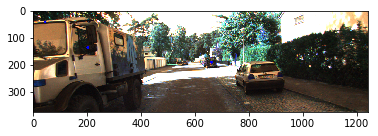

In [261]:
plt.imshow(image)

In [264]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Loading Labels files

In [54]:
filename_txt = 'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/data_object_label_2/training/label_2/000019.txt'

In [268]:
def generate_anchors(grid_size, input_size, anchors_seed):
    """
    :param grid_size: (grid_height, grid_widht), shape of the ConvDet layer
    :param input_size: (height, width), shape of input image
    :param anchor_seeds: np.ndarray(N, 2), where N is anchors per grid
    :return: np.ndarray(A, 4), in xyxy format, where  A = N * grid_height * grid_width
     """
    assert anchors_seed.shape[1] == 2
        
    anchors_per_grid = anchors_seed.shape[0]
    grid_width, grid_height = grid_size
    
    anchors_shape = np.reshape(
        grid_width * grid_height * [anchors_seed],
        (grid_height, grid_width, anchors_per_grid, 2)
     )

    input_height, input_width = input_size
    anchors_center_x, anchors_center_y = np.meshgrid(
        input_width * ( 1 / (grid_width * 2) + np.linspace(0, 1, grid_width + 1)[:-1]),
        input_height * (1 / (grid_height * 2) + np.linspace(0,1, grid_height + 1)[:-1])

     )
    anchors_center = np.stack((anchors_center_x, anchors_center_y), axis=2)
    anchors_center = np.repeat(
        np.reshape(
            anchors_center, (grid_height, grid_width, 1, 2)
        ), anchors_per_grid, axis =2
    )
    anchors_xywh = np.concatenate((anchors_center, anchors_shape), axis=3)

    return np.reshape(anchors_xywh, (-1, 4))
    


In [272]:
N = 
np.ndarray(N,2)

TypeError: data type not understood

In [269]:
generate_anchors((40, 60), image.shape, (9,2))

AttributeError: 'tuple' object has no attribute 'shape'

In [266]:
file1 = open(filename_txt, "r")

file1.readlines()

NameError: name 'filename_txt' is not defined

# Image Transformation Functions

In [255]:
image = cv2.imread(filename)
image_id = '0019'


In [256]:
image_meta = {'index': 0,
              'image_id': image_id,
              'orig_size': np.array(image.shape, dtype=np.int32)}


In [153]:
np.array(image.shape, dtype=np.int32)

array([ 375, 1242,    3])

In [107]:
image_meta

{'index': 0, 'image_id': '0019', 'orig_size': array([ 375, 1242,    3])}

In [220]:
boxes_xyxy = np.array([[0.00, 0.00, 424.74, 374.00],
         [742.41, 184.49, 944.56, 321.39],
         [639.17, 169.69, 683.48, 212.97],
         [551.01, 184.06, 575.42, 204.29]])

In [274]:
boxes_xyxy.shape[0]

4

In [242]:
def xyxy_to_xywh(boxes_xyxy):
    assert np.ndim(boxes_xyxy) == 2
    assert np.all(boxes_xyxy[:, 0] < boxes_xyxy[:, 2])
    assert np.all(boxes_xyxy[:, 1] < boxes_xyxy[:, 3])

    return np.concatenate([
        (boxes_xyxy[:, [0]] + boxes_xyxy[:, [2]]) / 2.,
        (boxes_xyxy[:, [1]] + boxes_xyxy[:, [3]]) / 2.,
        boxes_xyxy[:, [2]] - boxes_xyxy[:, [0]] + 1.,
        boxes_xyxy[:, [3]] - boxes_xyxy[:, [1]] + 1.
    ], axis=1)


In [249]:
xyxy = xyxy_to_xywh(boxes_xyxy).astype(int)

In [250]:
xyxy

array([[212, 187, 425, 375],
       [843, 252, 203, 137],
       [661, 191,  45,  44],
       [563, 194,  25,  21]])

In [246]:
xyxy[1][0]

843.4849999999999

In [247]:
xyxy[1][1]

252.94

In [221]:
center_x = boxes_xyxy[:, [0]] + boxes_xyxy[:, [2]]/ 2.

In [241]:
center_x[1]

array([1214.])

In [222]:
center_y = (boxes_xyxy[:, [1]] + boxes_xyxy[:, [3]]) / 2.

In [223]:
w = boxes_xyxy[:, [2]] - boxes_xyxy[:, [0]] + 1.

In [224]:
h = boxes_xyxy[:, [3]] - boxes_xyxy[:, [1]] + 1.

In [227]:
boxes_xywh = np.concatenate([center_x, center_y, w, h])

In [228]:
boxes_xywh

array([[ 212.37 ],
       [1214.69 ],
       [ 980.91 ],
       [ 838.72 ],
       [ 187.   ],
       [ 252.94 ],
       [ 191.33 ],
       [ 194.175],
       [ 425.74 ],
       [ 203.15 ],
       [  45.31 ],
       [  25.41 ],
       [ 375.   ],
       [ 137.9  ],
       [  44.28 ],
       [  21.23 ]])

In [60]:
max_drift_y = image_meta['orig_size'][0] //4
max_drift_x = image_meta['orig_size'][1] // 8

print(max_drift_y, max_drift_x)

93 155


In [53]:
max_boxes_y = min(boxes[:, 1]) if boxes is not None else max_drift_y
max_boxes_x = min(boxes[:, 0]) if boxes is not None else max_drift_x

In [55]:
max_boxes_y

169.69

In [109]:
def drift(image, image_meta, prob=0., boxes=None):
    """
    :param image: image to be transformed
    :param image_meta: dictionary object containing id, obj_id, image shape etc.
    :param prob: probability of performing this function
    :param boxes: ground-truth boxes for the image
    """
    drifts = np.array([0,0], dtype=np.int32)  # [0,0]
    drifted_size = np.array(image.shape, dtype=np.int32)   # [375, 1242, 3]

    # generates a random number, prob is passed in through args
    if np.random.uniform() < prob:
        max_drift_y = image_meta['orig_size'][0] //4   # divides the height by 4 i.e. 93
        max_drift_x = image_meta['orig_size'][1] // 8  # divides the width by 8 i.e. 155
        max_boxes_y = min(boxes[:, 1]) if boxes is not None else max_drift_y  # finds the min y value from boxes 
        max_boxes_x = min(boxes[:, 0]) if boxes is not None else max_drift_x  # finds the min x value from boxes 

        dy = np.random.randint(-max_drift_y, min(max_drift_y, max_boxes_y))   # find random integer b/w max drift and minimum number between max drift and minimum y value
        dx = np.random.randint(-max_drift_x, min(max_drift_x, max_boxes_x))
        drifts = np.array([dy, dx], dtype=np.int32)

        image_height = image_meta['orig_size'][0] - dy
        image_width = image_meta['orig_size'][1] - dx

        orig_x, orig_y = max(dx, 0), max(dy, 0)
        drift_x, drift_y = max(-dx, 0), max(-dy, 0)

        drifted_image = np.zeros((image_height, image_width, 3)).astype(np.float32)
        drifted_image[drift_y:, drift_x:, :] = image[orig_y:, orig_x:, :]
        image = drifted_image 
        drifted_size = np.array(image.shape, dtype=np.int32)

        if boxes is not None:
            boxes[:, [0, 2]] -= dx
            boxes[:, [1, 3]] -= dy

    image_meta.update({'drifts': drifts, 'drifted_size': drifted_size})

    return image, image_meta, boxes 
    

In [97]:
image_height = image_meta['orig_size'][1] - dy
image_height

1280

In [98]:
image, image_meta, boxes = drift(image, image_meta, prob=0.5, boxes=boxes)

In [111]:
drift(image, image_meta, prob=0.5, boxes=boxes)

(array([[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [55., 49., 38.],
         [54., 49., 34.],
         [53., 48., 32.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [49., 48., 39.],
         [47., 48., 35.],
         [50., 48., 31.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [50., 43., 40.],
  

In [113]:
boxes_new = boxes

In [122]:
x = [boxes_new[:, [0,2]]]
y = [boxes_new[:, [1,3]]]

In [143]:
x_0 = x[0][3][0].astype(np.int32)
x_1 = x[0][3][1].astype(np.int32)

In [144]:
y_0 = y[0][3][0].astype(np.int32)
y_1 = y[0][3][1].astype(np.int32)

In [145]:
image = cv2.line(image, (x_0, y_0), (y_0, y_1), (0, 130, 100),5)

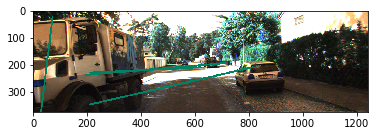

In [146]:
plt.imshow(image)

In [157]:
def flip(image, image_meta, prob=0., boxes=None):
    """
    :param image
    :param image_meta: dict
    :param prob: probability of flipping
    :param boxes: boxes data
    """

    flipped = False
    if np.random.uniform() < prob:
        flipped = True
        image = image[:, ::-1, :].copy()

    if flipped and boxes is not None:
        image_width = image.shape[1]
        boxes_widths = boxes[:, 2] - boxes[:, 0]   # take the right x coordinate and subtract from the left
        boxes[:, 0] = image_width - 1 - boxes[:, 2]
        boxes[:, 2] = boxes[:, 0] + boxes_widths

    image_meta.update({'flipped': flipped})

    return image, image_meta, boxes

In [165]:
def resize(image, image_meta, target_size, boxes=None):
    height, width = image.shape[:2]
    scales = np.array([target_size[0] / height, target_size[1] / width], dtype=np.float32)
    image = cv2.resize(image, (target_size[1], target_size[0]))

    if boxes is not None:
        boxes[:, [0, 2]] *= scales[1]
        boxes[:, [1, 3]] *= scales[0]

    image_meta.update({'scales': scales})

    return image, image_meta, boxes


In [169]:
def resize(image, image_meta, target_size, boxes=None):
    """
    Can call on this function when your model would work with a different sized image 

    :param image: image 
    :param image_meta: dictionary
    :param target_size: target size you want to pass into the model 
    :param boxes: gt boxes
    """
    height, width = image.shape[:2]
    scales = np.array([target_size[0] / height, target_size[1] / width], dtype=np.float32)
    image = cv2.resize(image, (target_size[1], target_size[0]))

    if boxes is not None:
        boxes[:, [0, 2]] *= scales[1]
        boxes[:, [1, 3]] *= scales[0]

    image_meta.update({'scales': scales})

    return image, image_meta, boxes

In [177]:
def crop_or_pad(image, image_meta, target_size, boxes=None):
    """
    :param image: image passed in
    :param image_meta: dictionary
    :param target_size (height, width)
    :param boxes: xyxy format
    """
    padding, crops = np.zeros(4, dtype=np.int16), np.zeros(4, dtype=np.int16)

    height, width = image.shape[:2]
    target_height, target_width = target_size 

    if height < target_height:
        padding[0] = (target_height - height) // 2
        padding[1] = (target_height - height) - padding[0]

    elif height > target_height:
        crops[0] = (height - target_height) // 2
        crops[1] = (height - target_height) - crops[0]

    if width < target_width:
        padding[2] = (target_width - width) // 2
        padding[3] = (target_width - width) - padding[2]

    elif width > target_width:
        crops[2] = (width - target_width) // 2
        crops[3] = (width - target_width) - crops[2]

    image, boxes = pad(image, padding, boxes=boxes)
    image, boxes = crop(image, crops, boxes=boxes)

    image_meta.update({'padding': padding, 'crops': crops})

    return image, image_meta, boxes

def pad(image, padding, boxes = None):
    """
    adds padding to the images 

    :param image: image passed in 
    :param padding: what padding to add
    :param boxes: xyxy format 
    :return:
    """
    if not np.all(padding==0):
        padding = (padding[:2], padding[2:], [0,0])
        image = np.pad(image, padding, mode='constant')

        if boxes is not None:
            boxes[:, [0, 2]] += padding[2]
            boxes[:, [1, 3]] += padding[0]

    return image, boxes 

def crop(image, crops, boxes=None):
    """
    adds padding to the images 

    :param image: image passed in 
    :param padding: what padding to add
    :param boxes: xyxy format 
    :return:
    """
    if not np.all(crops == 0):
        image = image[crops[0]:-crops[1], :, :] if crops[1] > 0 else image[crops[0]:, :, :]
        image = image[:, crops[2]:-crops[3], :] if crops[3] > 0 else image[:, crops[2]:, :]

        if boxes is not None:
            boxes[:, [0, 2]] -= crops[2]
            boxes[:, [1, 3]] -= crops[0]
            boxes = np.maximum(boxes, 0.)

    return image, boxes 

In [180]:
image, image_meta, boxes = crop_or_pad(image, image_meta, (500, 1700), boxes=boxes)


In [171]:
image, image_meta, boxes = resize(image, image_meta, (300, 500), boxes=None)

In [161]:
image, image_meta, boxes = flip(image, image_meta, prob=0.9, boxes=boxes)

In [181]:
cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
dy = np.random.randint(-max_drift_y, min(max_drift_y, max_boxes_y))
dx = np.random.randint(-max_drift_x, min(max_drift_x, max_boxes_x))

dy, dx

(-38, 47)

In [38]:
def whiten(image, image_met, mean=[93.877, 98.801, 95.923], std=[78.782, 80.130, 81.200]):
    """
    Whitens the image by subtracting the mean and dividing by the std
    
    :param image: input image
    :param image_meta: identifications of image
    :param mean: calculated based on the dataset, float
    :param std: calculated from the dataset, float
    """
    
    image = (image - mean) / std
    image_meta.update({'rgb_mean': mean, 'rgb_std': std})
    return image, image_meta

In [41]:
new_img = whiten(image, image_meta)

In [32]:
image_meta

NameError: name 'image_meta' is not defined

In [34]:
image.shape

(375, 1242, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


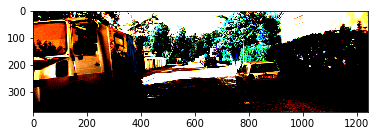

In [43]:
plt.imshow(new_img[0])

In [45]:
cv2.imshow('new', new_img[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
test = np.array([0,0], dtype=np.int32)
test

array([0, 0])

In [51]:
drifted_size = np.array(image.shape, dtype=np.int32)

In [60]:
data_dir = 'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/kitti_data/'

In [61]:
sample_set_name = 'train.txt'

In [62]:
sample_ids_path = os.path.join(data_dir, 'image_sets/', sample_set_name)

In [69]:
with open(sample_ids_path, 'r') as fp:
    sample_ids = fp.readlines()
    print(sample_ids[:10])
sample_ids = tuple(x.strip() for x in sample_ids)

['000000\n', '000006\n', '000007\n', '000008\n', '000012\n', '000014\n', '000015\n', '000017\n', '000018\n', '000019\n']


In [70]:
len(sample_ids)

4987

In [71]:
data_dir = 'C:/Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/kitti_data/'

In [72]:
image_path = os.path.join(data_dir, 'training/image_2/', image_id + '.png')

In [73]:
image_path

'C:/Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/kitti_data/training/image_2\\0019.png'

In [74]:
input_size = (384, 1248)
grid_size = tuple(x // 16 for x in input_size)
print(grid_size)

(24, 78)


In [ ]:
def create_data_lists(train, test, output_folder):
    """
    Create lists of images, bounding boxes, labels of the objects in these images,
    and save them to file.
    
    :param voc07_path: path to the 'VOC2007' folder
    :param voc12_path: path to the 'VOC2012' folder
    :param output_folder: folder where the JSONs must be saved
    """
    train_path = os.path.abspath(train)
    test_path = os.path.abspath(test)
    
    train_images = list()
    train_objects = list()
    n_objects = 0
    
    
    # load the training data
    
    for path in [train_path, test_path]:
        
        with open(os.path.join(path, 'image_sets/trainval.txt')) as f:
            ids = f.read().splitlines()
            
        for id in ids:
            objects = parse_annotation(os.path.join(path, 'Annotations', id = '.xml'))
            if len(objects) == 0:
                continue
            
            n_objects += len(objects)
            train_objects.append(objects)
            train_images.append(os.path.join(path, 'JPEGImages', id + '.jpg'))
        
    assert len(train_objects) == len(train_images)

In [5]:
path = 'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/SqueezeDet-PyTorch/data/kitti/'

with open(os.path.join(path, 'image_sets/trainval.txt')) as f:
    ids = f.read().splitlines()


In [18]:
train_images= []


In [19]:
for id in ids:
    train_images.append(os.path.join(path, 'training/image_2/', id + '.png'))

In [20]:
train_images[0]

'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/SqueezeDet-PyTorch/data/kitti/training/image_2/000000.png'

In [21]:
train_images[0]

'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/SqueezeDet-PyTorch/data/kitti/training/image_2/000000.png'

# DataLoader for Kitti Dataset:

In [62]:
import torch
import numpy as np
import os
import torch.utils.data


In [ ]:
# inherits from the dataset class from torch
class BaseDataset(torch.utils.data.Dataset):
    def __init__(self, phase, cfg):
        super(BaseDataset, self).__init__()
        
        self.phase = phase
        self.cfg = cfg
    
    def __getitem__(self,index):
        image, image_id = self.load_image(index)   # pass in the index for the image
        gt_class_ids, gt_boxes = self.load_annotations(index)   # get ground truth boxes
        image_meta = {'index': index,
                      'image_id': image_id,
                      'orig_size': np.array(image.shape, dtype=np.int32)}  # a lot of things are gonna be appended to the dictionary as we load images
        image, image_meta, gt_boxes = self.preprocess(image, image_meta, gt_boxes)
        gt = self.prepare_annotations(gt_class_ids, gt_boxes)
        
        inp = {'image': image.transpose(2, 0, 1),
               'image_meta': image_meta,
               'gt': gt}
        if self.cfg.debug == 1:
            image = image * image_meta['rgb_std'] + image_meta['rgb_mean']
            save_path = os.path.join(self.cfg.debug_dir, image_meta['image_id'] + '.png')
            visualize_boxes(image, gt_class_ids, gt_boxes,
                            class_names=self.class_names,
                            save_path=save_path)

        return inp
        
    def __len__(self):
        return len(self.sample_ids)
    
    
    def preprocess(image, image_meta, boxes=None):
        if boxes is not None:
            boxes[:, [0,2]] = n[/]
        
        
# write load_image function that loads the image


    def load_image(self, index):
        raise NotImplementedError
    def load_annotations(self, index):
        raise NotImplementError
        
        
        

In [84]:
anchors_seed = np.array([[34, 30], [75, 45], [38, 90],
          [127, 68], [80, 174], [196, 97],
          [194, 178], [283, 156], [381, 185]], dtype=np.float32)

In [85]:
anchors_per_grid = anchors_seed.shape[0]

# Generating anchors:
define the anchor grid: divide the input_size / the estimated final feature map size. In our case, it would be 16.
We create anchor_seeds <- do these refer to the anchor sizes relative to the image size or are these just there to refer to the anchor boxes later?
Generate Anchors takes in the grid size, input_size, and anchors_seed.
- anchors_per_grid would be number of anchors so anchors_seed.shape[0]
- Grid Height and width is calculated by dividing the input_size by the estimated ratio of the final feature map compared to image. In our case it is 16. so we get (384, 1248) / 16 == (24, 78)
- 

In [124]:
grid_width = 78
grid_height = 24

anchors_shape = np.reshape(
        grid_width * grid_height * [anchors_seed],
        (grid_height, grid_width, anchors_per_grid, 2)
    )

In [125]:
anchors_shape.shape

(24, 78, 9, 2)

In [126]:
image.shape

(375, 1242, 3)

In [127]:
input_height, input_width = (384, 1248)
print(input_height, input_width)

384 1248


In [128]:
anchors_center_x, anchors_center_y = np.meshgrid(
        input_width * (1 / (grid_width * 2) + np.linspace(0, 1, grid_width + 1)[:-1]),
        input_height * (1 / (grid_height * 2) + np.linspace(0, 1, grid_height + 1)[:-1])
    )

In [129]:
anchors_center = np.stack((anchors_center_x, anchors_center_y), axis=2)

In [130]:
anchors_center = np.repeat(
    np.reshape(
        anchors_center, (grid_height, grid_width, 1, 2)
    ), 9, axis=2
)

In [137]:
anchors_xywh = np.concatenate((anchors_center, anchors_shape), axis=3)


In [140]:
len(anchors_xywh)

24

In [136]:
anchors_center[23][0]

array([[  8., 376.],
       [  8., 376.],
       [  8., 376.],
       [  8., 376.],
       [  8., 376.],
       [  8., 376.],
       [  8., 376.],
       [  8., 376.],
       [  8., 376.]])

In [30]:
np.array(image.shape)

array([ 375, 1242,    3])

In [27]:
boxes = np.array([[0.00, 0.00, 424.74, 374.00],
         [742.41, 184.49, 944.56, 321.39],
         [639.17, 169.69, 683.48, 212.97],
         [551.01, 184.06, 575.42, 204.29]])

In [28]:
boxes[:, [0, 2]] = np.clip(boxes[:, [0, 2]], 0., 1242 - 1.)
boxes[:, [1, 3]] = np.clip(boxes[:, [1, 3]], 0., 375 - 1.)

In [29]:
boxes

array([[  0.  ,   0.  , 424.74, 374.  ],
       [742.41, 184.49, 944.56, 321.39],
       [639.17, 169.69, 683.48, 212.97],
       [551.01, 184.06, 575.42, 204.29]])

In [31]:
np.random.uniform()

0.8350001597201965